<a href="https://colab.research.google.com/github/JSEFERINO/Dise-o_de_Experimentos_DOE/blob/main/Tarea_2_DCL_Python_R_pablo_pertuz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python

In [ ]:
!pip install tabulate

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import scipy.stats as stats
from tabulate import tabulate

**Datos**

In [ ]:

FILTRO: list =   ['F1','F1','F1','F2','F2','F2',
                 'F1','F1','F1','F2','F2','F2',
                 'F1','F2','F2','F1','F2','F1',
                 'F2','F2','F1','F1','F1','F2',
                 'F2','F1','F2','F2','F1','F1',
                 'F2','F2','F2','F1','F1','F1']

RUIDO: list =    ['R1','R2','R3','R1','R3','R2',
                 'R3','R1','R2','R3','R2','R1',
                 'R2','R2','R3','R1','R1','R3',
                 'R2','R1','R1','R2','R3','R3',
                 'R3','R3','R1','R2','R1','R2',
                 'R1','R3','R2','R3','R2','R1']

MOMENTO: list =   ['M1','M1','M1','M1','M1','M1',
                 'M2','M2','M2','M2','M2','M2',
                 'M3','M3','M3','M3','M3','M3',
                 'M4','M4','M4','M4','M4','M4',
                 'M5','M5','M5','M5','M5','M5',
                 'M6','M6','M6','M6','M6','M6']

OPERADOR: list =  ['O1','O2','O3','O4','O5','O6',
                 'O1','O2','O3','O4','O5','O6',
                 'O1','O2','O3','O4','O5','O6',
                 'O1','O2','O3','O4','O5','O6',
                 'O1','O2','O3','O4','O5','O6',
                 'O1','O2','O3','O4','O5','O6']

Intensidad: list =[90, 106, 108, 81, 90, 88, 114, 96, 105, 83, 86, 84,
          102 , 90 , 95 , 92 , 85 , 104, 87, 84, 100, 96, 110, 91,
          93	, 112	, 92	, 80	, 90	, 98,  86	, 91	, 97	, 98	, 100	, 92 ]

Combinacion: list  =  ['A','B','C','D','F','E',
                 'C','A','B','F','E','D',
                 'B','E','F','A','D','C',
                 'E','D','A','B','C','F',
                 'F','C','D','E','A','B',
                 'D','F','E','C','B','A']

In [ ]:

# Crear el DataFrame
df1 = pd.DataFrame({
    'MOMENTO': MOMENTO,
    'OPERADOR': OPERADOR,
    'Combinacion': Combinacion,
    'Intensidad': Intensidad,
    'FILTRO': FILTRO,
    'RUIDO': RUIDO
})
df1.head()

,MOMENTO,OPERADOR,Combinacion,Intensidad,FILTRO,RUIDO
0,M1,O1,A,90,F1,R1
1,M1,O2,B,106,F1,R2
2,M1,O3,C,108,F1,R3
3,M1,O4,D,81,F2,R1
4,M1,O5,F,90,F2,R3


**Suma y media de los tratamientos**

In [ ]:
# Calculo de las sumas y las medias
summary = df1.groupby('Combinacion').agg({
    'Intensidad': 'sum',
}).reset_index()

# Calculo de las sumas de cuadrados
summary['suma_T^2'] = summary['Intensidad'] ** 2

# Calculo de la media
summary['media_T'] = summary['Intensidad'] / 6

# Calculo de sumas totales
sum_Y_ij = summary['Intensidad'].sum()
sum_Tr_2 = (summary['Intensidad'] ** 2).sum()
sum_Y2_ij = (df1['Intensidad'] ** 2).sum()

# Crear un DataFrame para los totales
totals = pd.DataFrame({
    'Combinacion': ['sum_Y_ij', 'sum_Y2_ij'],
    'Intensidad': [sum_Y_ij, sum_Y2_ij],
    'suma_T^2': [sum_Y_ij ** 2, sum_Tr_2],
    'media_T': ['', ''],
})

# Concatenar los totales al resumen
final_summary = pd.concat([summary, totals], ignore_index=True)

# Mostrar las columnas
final_summary = final_summary[['Combinacion', 'Intensidad', 'suma_T^2', 'media_T']]

# Mostrar la tabla
print(tabulate(final_summary, headers='keys', tablefmt='pretty'))


+---+-------------+------------+----------+--------------------+
|   | Combinacion | Intensidad | suma_T^2 |      media_T       |
+---+-------------+------------+----------+--------------------+
| 0 |      A      |    560     |  313600  | 93.33333333333333  |
| 1 |      B      |    607     |  368449  | 101.16666666666667 |
| 2 |      C      |    646     |  417316  | 107.66666666666667 |
| 3 |      D      |    512     |  262144  | 85.33333333333333  |
| 4 |      E      |    528     |  278784  |        88.0        |
| 5 |      F      |    543     |  294849  |        90.5        |
| 6 |  sum_Y_ij   |    3396    | 11532816 |                    |
| 7 |  sum_Y2_ij  |   323154   | 1935142  |                    |
+---+-------------+------------+----------+--------------------+


**Suma y media para los bloques**

In [ ]:
                                                    #Para los momentos del día
# Calculo de las sumas y las medias
summary_m = df1.groupby('MOMENTO').agg({
    'Intensidad': 'sum',
}).reset_index()

# Calculo de la suma de cuadrados y la media
summary_m['suma_T^2'] = summary_m['Intensidad'] ** 2
summary_m['media_T'] = summary_m['Intensidad'] / 6

# Calculo de las sumas totales
sum_Y_ij_m = summary_m['Intensidad'].sum()
sum_Tr_2_m = (summary_m['Intensidad'] ** 2).sum()

#DataFrame
totals_m = pd.DataFrame({
    'MOMENTO': ['sum_Y_ij'],
    'Intensidad': [sum_Y_ij_m],
    'media_T': [''],
    'suma_T^2': [sum_Y_ij_m ** 2],
})

# Concatenar los totales al resumen
final_summary_m = pd.concat([summary_m, totals_m], ignore_index=True)

# Mostrar la tabla
print("Resumen por momento del día:")
print(tabulate(final_summary_m, headers='keys', tablefmt='pretty'))


                                                    #Para los operadores

summary_o = df1.groupby('OPERADOR').agg({
    'Intensidad': 'sum',
}).reset_index()

# Calculo de la suma de cuadrados y la media
summary_o['suma_T^2'] = summary_o['Intensidad'] ** 2
summary_o['media_T'] = summary_o['Intensidad'] / 6

# Calculo de las sumas totales
sum_Y_ij_o = summary_o['Intensidad'].sum()
sum_Tr_2_o = (summary_o['Intensidad'] ** 2).sum()

#DataFrame
totals_o = pd.DataFrame({
    'OPERADOR': ['sum_Y_ij'],
    'Intensidad': [sum_Y_ij_o],
    'media_T': [''],
    'suma_T^2': [sum_Y_ij_o ** 2],
})

# Concatenar los totales al resumen
final_summary_o = pd.concat([summary_o, totals_o], ignore_index=True)

# Mostrar la tabla para OPERADORES
print("\nResumen por operadores:")
print(tabulate(final_summary_o, headers='keys', tablefmt='pretty'))


Resumen por momento del día:
+---+----------+------------+----------+-------------------+
|   | MOMENTO  | Intensidad | suma_T^2 |      media_T      |
+---+----------+------------+----------+-------------------+
| 0 |    M1    |    563     |  316969  | 93.83333333333333 |
| 1 |    M2    |    568     |  322624  | 94.66666666666667 |
| 2 |    M3    |    568     |  322624  | 94.66666666666667 |
| 3 |    M4    |    568     |  322624  | 94.66666666666667 |
| 4 |    M5    |    565     |  319225  | 94.16666666666667 |
| 5 |    M6    |    564     |  318096  |       94.0        |
| 6 | sum_Y_ij |    3396    | 11532816 |                   |
+---+----------+------------+----------+-------------------+

Resumen por operadores:
+---+----------+------------+----------+-------------------+
|   | OPERADOR | Intensidad | suma_T^2 |      media_T      |
+---+----------+------------+----------+-------------------+
| 0 |    O1    |    572     |  327184  | 95.33333333333333 |
| 1 |    O2    |    579     |  

**Suma y media para los Filtros y los niveles de Ruido**

In [ ]:
# Calculo de la suma, media y suma_T^2 para FILTRO
summary_filtro = df1.groupby('FILTRO')['Intensidad'].agg(['sum', 'mean']).reset_index()
summary_filtro['suma_T^2'] = summary_filtro['sum'] ** 2
sum_Y_ij_filtro = summary_filtro['sum'].sum()
summary_filtro.columns = ['FILTRO', 'Suma_Intensidad', 'Media_Intensidad', 'suma_T^2']

# Calculo de la  suma, media y suma_T^2 para RUIDO
summary_ruido = df1.groupby('RUIDO')['Intensidad'].agg(['sum', 'mean']).reset_index()
summary_ruido['suma_T^2'] = summary_ruido['sum'] ** 2
sum_Y_ij_ruido = summary_ruido['sum'].sum()
summary_ruido.columns = ['RUIDO', 'Suma_Intensidad', 'Media_Intensidad', 'suma_T^2']

# Añadir filas totales
totals_filtro = pd.DataFrame({
    'FILTRO': ['sum_Y_ij'],
    'Suma_Intensidad': [sum_Y_ij_filtro],
    'suma_T^2': [sum_Y_ij_filtro ** 2],
    'Media_Intensidad': ['']
})

totals_ruido = pd.DataFrame({
    'RUIDO': ['sum_Y_ij'],
    'Suma_Intensidad': [sum_Y_ij_ruido],
    'Media_Intensidad': [''],
    'suma_T^2': [sum_Y_ij_ruido ** 2]
})

# Concatenar los totales
summary_filtro = pd.concat([summary_filtro, totals_filtro], ignore_index=True)
summary_ruido = pd.concat([summary_ruido, totals_ruido], ignore_index=True)

# Mostrar las columnas[aqui]
summary_filtro = summary_filtro[['FILTRO', 'Suma_Intensidad', 'suma_T^2', 'Media_Intensidad']]
summary_ruido = summary_ruido[['RUIDO', 'Suma_Intensidad', 'suma_T^2', 'Media_Intensidad']]


# Mostrar las tablas
print("Resumen por FILTRO:")
print(tabulate(summary_filtro, headers='keys', tablefmt='pretty', floatfmt=".2f"))

print("\nResumen por RUIDO:")
print(tabulate(summary_ruido, headers='keys', tablefmt='pretty', floatfmt=".2f"))


Resumen por FILTRO:
+---+----------+-----------------+----------+--------------------+
|   |  FILTRO  | Suma_Intensidad | suma_T^2 |  Media_Intensidad  |
+---+----------+-----------------+----------+--------------------+
| 0 |    F1    |      1813       | 3286969  | 100.72222222222223 |
| 1 |    F2    |      1583       | 2505889  | 87.94444444444444  |
| 2 | sum_Y_ij |      3396       | 11532816 |                    |
+---+----------+-----------------+----------+--------------------+

Resumen por RUIDO:
+---+----------+-----------------+----------+-------------------+
|   |  RUIDO   | Suma_Intensidad | suma_T^2 | Media_Intensidad  |
+---+----------+-----------------+----------+-------------------+
| 0 |    R1    |      1072       | 1149184  | 89.33333333333333 |
| 1 |    R2    |      1135       | 1288225  | 94.58333333333333 |
| 2 |    R3    |      1189       | 1413721  | 99.08333333333333 |
| 3 | sum_Y_ij |      3396       | 11532816 |                   |
+---+----------+-------------

**Variabilidad y varianza**

In [ ]:
                                        #Tratamientos
k = 6 # Total Tratamientos
SCTr = sum_Tr_2/k - sum_Y_ij**2/k**2
CMTr = SCTr/(k-1)

print(f'Variabilidad de los tratamientos es = {SCTr}')
print(f'Varianza de los tratamientos es = {CMTr}')

                                        #Bloques
SCB1 = summary_m['suma_T^2'].sum() / k - sum_Y_ij_m**2 / k**2
CMB1 = SCB1 / (k - 1)
summary_o['suma_T^2'] = summary_o['Intensidad'] ** 2
sum_Y_ij_o = summary_o['Intensidad'].sum()
SCB2 = summary_o['suma_T^2'].sum() / k - sum_Y_ij_o**2 / k**2
CMB2 = SCB2 / (k - 1)

print(f'Variabilidad de Bloque 1 es = {SCB1}')
print(f'Varianza de Bloque 1 es = {CMB1}')
print(f'Variabilidad de Bloque 2 es = {SCB2}')
print(f'Varianza de Bloque 2 es = {CMB2}')

                                        #Datos
SCD = sum_Y2_ij - sum_Y_ij**2/k**2
CMD = SCD/(k**2-1)
print(f'Variabilidad Total es = {SCD}')
print(f'Varianza Total es = {CMD}')


                                        #Error
SCE = SCD - SCTr -SCB1 - SCB2
CME = SCE/((k-2)*(k-1))
print(f'Variabilidad del error es = {SCE}')
print(f'Varianza del error es = {CME}')

                                        #Filtro



# Calcular la suma de las intensidades para cada nivel de FILTRO
sumas_filtro = df1.groupby('FILTRO')['Intensidad'].sum()

# Calcular sumc_sum_filtro: suma de los cuadrados de las sumas
sumc_sum_filtro = (sumas_filtro ** 2).sum()

# Calcular sum_Yij
sum_Yij = df1['Intensidad'].sum()

sumc_sum_filtro = (df1.groupby('FILTRO')['Intensidad'].sum() ** 2).sum()  # Suma de los cuadrados de las medias de FILTRO

# Definir I, J, y n
I = len(df1['FILTRO'].unique())  # Número de niveles en FILTRO
J = len(df1['RUIDO'].unique())    # Número de niveles en RUIDO
n = 6  # Número de repeticiones por combinación
N = I * J * n  # Total de observaciones

# Calcular SSF y MSF
SSF = sumc_sum_filtro / (J * n) - (sum_Yij ** 2 / N)
MSF = SSF / (I - 1)

print(f'Variablidad (Sum cuadrados) del Filtro: {SSF}')
print(f'Varianza (Med cuadrados Filtro) del filtro: {MSF}')


# Calcular la Varianza y variabilidad para cada FILTRO
summary_filtro = df1.groupby('FILTRO')['Intensidad'].agg(['sum', 'mean', 'count']).reset_index()
summary_filtro['SS'] = (df1.groupby('FILTRO')['Intensidad'].apply(lambda x: (x**2).sum())).values
summary_filtro['Varianza'] = summary_filtro['SS'] / (summary_filtro['count'] - 1)

# Renombrar columnas
summary_filtro.columns = ['FILTRO', 'Suma_Intensidad', 'Media_Intensidad', 'count', 'SS', 'Varianza']

# Seleccionar la primera columna y las dos últimas columnas
summary_filtro = summary_filtro.iloc[:, [0, -2, -1]]

# Mostrar las tablas
print("\n")
print("Resumen por FILTRO:")
print(tabulate(summary_filtro, headers='keys', tablefmt='pretty', floatfmt=".2f"))


                                        #Ruido

# Calcular la suma de las intensidades para cada nivel de RUIDO
sumas_ruido = df1.groupby('RUIDO')['Intensidad'].sum()

# Calcular sumc_sum_ruido: suma de los cuadrados de las sumas de intensidades por nivel de RUIDO
sumc_sum_ruido = (sumas_ruido ** 2).sum()

# Calcular SSR (Suma de cuadrados del RUIDO) y MSR (Media de cuadrados del RUIDO)
SSR = sumc_sum_ruido / (I * n) - (sum_Yij ** 2 / N)
MSR = SSR / (J - 1)

# Mostrar los resultados
print("\n")
print(f'La variabilidad de los ruidos es = {SSR}')
print(f'La varianza de los ruidos es = {MSR}')


# Calcular la Varianza y variabilidad para cada RUIDO
summary_ruido = df1.groupby('RUIDO')['Intensidad'].agg(['sum', 'mean', 'count']).reset_index()
summary_ruido['SS'] = (df1.groupby('RUIDO')['Intensidad'].apply(lambda x: (x**2).sum())).values
summary_ruido['Varianza'] = summary_ruido['SS'] / (summary_ruido['count'] - 1)

# Renombrar columnas
summary_ruido.columns = ['RUIDO', 'Suma_Intensidad', 'Media_Intensidad', 'count', 'SS', 'Varianza']
# Seleccionar la primera columna y las dos últimas columnas
summary_ruido = summary_ruido.iloc[:, [0, -2, -1]]
print("\nResumen por RUIDO:")
print(tabulate(summary_ruido, headers='keys', tablefmt='pretty', floatfmt=".2f"))





Variabilidad de los tratamientos es = 2167.666666666686
Varianza de los tratamientos es = 433.5333333333372
Variabilidad de Bloque 1 es = 4.333333333313931
Varianza de Bloque 1 es = 0.8666666666627861
Variabilidad de Bloque 2 es = 428.0
Varianza de Bloque 2 es = 85.6
Variabilidad Total es = 2798.0
Varianza Total es = 79.94285714285714
Variabilidad del error es = 198.0
Varianza del error es = 9.9
Variablidad (Sum cuadrados) del Filtro: 1469.444444444438
Varianza (Med cuadrados Filtro) del filtro: 1469.444444444438


Resumen por FILTRO:
+---+--------+--------+--------------------+
|   | FILTRO |   SS   |      Varianza      |
+---+--------+--------+--------------------+
| 0 |   F1   | 183553 | 10797.235294117647 |
| 1 |   F2   | 139601 | 8211.823529411764  |
+---+--------+--------+--------------------+


La variabilidad de los ruidos es = 571.5
La varianza de los ruidos es = 285.75

Resumen por RUIDO:
+---+-------+--------+--------------------+
|   | RUIDO |   SS   |      Varianza      |


**ANOVA**

In [ ]:
anova_data = {
    'Fuente': ['Tratamiento', 'MOMENTO', 'OPERADOR', 'Error', 'Total'],
    'SS': [SCTr, SCB1, SCB2, SCE, SCD],
    'g.l': [k - 1, k - 1, k - 1, (k - 2) * (k - 1), k**2 - 1],
    'MS': [CMTr, CMB1, CMB2, CME, ''],
    'F': [CMTr / CME if CME != 0 else '', CMB1 / CME if CME != 0 else '', CMB2 / CME if CME != 0 else '', '', ''],
    'valor_p': [1 - stats.f.cdf(CMTr / CME, k - 1, (k - 2) * (k - 1)) if CME != 0 else '',
                 1 - stats.f.cdf(CMB1 / CME, k - 1, (k - 2) * (k - 1)) if CME != 0 else '',
                 1 - stats.f.cdf(CMB2 / CME, k - 1, (k - 2) * (k - 1)) if CME != 0 else '', '', '']
}

anova_df = pd.DataFrame(anova_data)

# Mostrar la tabla ANOVA
print("La tabla ANOVA es")
print(tabulate(anova_df, headers='keys', tablefmt='pretty', floatfmt=".4f"))

La tabla ANOVA es
+---+-------------+-------------------+-----+--------------------+---------------------+------------------------+
|   |   Fuente    |        SS         | g.l |         MS         |          F          |        valor_p         |
+---+-------------+-------------------+-----+--------------------+---------------------+------------------------+
| 0 | Tratamiento | 2167.666666666686 |  5  | 433.5333333333372  |  43.79124579124618  | 4.2500658548050296e-10 |
| 1 |   MOMENTO   | 4.333333333313931 |  5  | 0.8666666666627861 | 0.08754208754169557 |   0.993364805414381    |
| 2 |  OPERADOR   |       428.0       |  5  |        85.6        |  8.646464646464645  | 0.00017103812234797733 |
| 3 |    Error    |       198.0       | 20  |        9.9         |                     |                        |
| 4 |    Total    |      2798.0       | 35  |                    |                     |                        |
+---+-------------+-------------------+-----+--------------------+----

**Prueba Tukey**

In [ ]:
# Ajustar el modelo ANOVA para los tratamientos
model = ols('Intensidad ~ Combinacion', data=df1).fit()  # Sin C()
anova_table = sm.stats.anova_lm(model, typ=2)
print(model.summary())
print(anova_table)

# Verificación de diferencias significativas en el ANOVA
if anova_table['PR(>F)'][0] < 0.05:  # Asegúrate de usar el nombre correcto para el p-valor
    # Realizar la prueba de Tukey
    tukey = pairwise_tukeyhsd(endog=df1['Intensidad'], groups=df1['Combinacion'], alpha=0.05)
    print("Resultados de la prueba de Tukey:")
    print(tukey)
else:
    print("No hay diferencias significativas entre los grupos según el ANOVA.")

                            OLS Regression Results                            
Dep. Variable:             Intensidad   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     20.63
Date:                Thu, 21 Nov 2024   Prob (F-statistic):           6.74e-09
Time:                        14:03:38   Log-Likelihood:                -102.61
No. Observations:                  36   AIC:                             217.2
Df Residuals:                      30   BIC:                             226.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           93.3333      1.871  

<ipython-input-15-707804e5cdc2>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:  # Asegúrate de usar el nombre correcto para el p-valor


Resultados de la prueba de Tukey:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
     A      B   7.8333 0.0601  -0.2161  15.8828  False
     A      C  14.3333 0.0001   6.2839  22.3828   True
     A      D     -8.0 0.0522 -16.0494   0.0494  False
     A      E  -5.3333 0.3577 -13.3828   2.7161  False
     A      F  -2.8333 0.8891 -10.8828   5.2161  False
     B      C      6.5 0.1697  -1.5494  14.5494  False
     B      D -15.8333    0.0 -23.8828  -7.7839   True
     B      E -13.1667 0.0003 -21.2161  -5.1172   True
     B      F -10.6667 0.0043 -18.7161  -2.6172   True
     C      D -22.3333    0.0 -30.3828 -14.2839   True
     C      E -19.6667    0.0 -27.7161 -11.6172   True
     C      F -17.1667    0.0 -25.2161  -9.1172   True
     D      E   2.6667 0.9117  -5.3828  10.7161  False
     D      F   5.1667  0.392  -2.8828  13.2161  False
     E      F      2.5 0.9314  

**BoxPlot**

<ipython-input-16-d93a81c788d0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='group1', y='meandiff', data=tukey_df, palette="Set2")


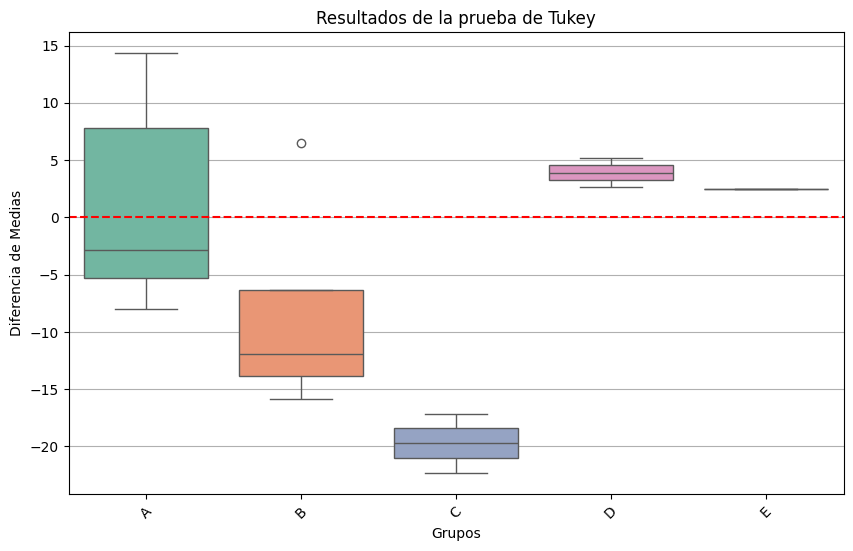

In [ ]:
# Convertir los resultados de Tukey a un DataFrame para graficar
tukey_df = pd.DataFrame(data=tukey.summary().data[1:], columns=tukey.summary().data[0])

# Gráfico de las comparaciones de Tukey meandiff
plt.figure(figsize=(10, 6))
sns.boxplot(x='group1', y='meandiff', data=tukey_df, palette="Set2")
plt.axhline(0, color='red', linestyle='--')  # Línea en y=0
plt.title('Resultados de la prueba de Tukey')
plt.xlabel('Grupos')
plt.ylabel('Diferencia de Medias')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


<Axes: title={'center': 'Intensidad vs Combinaciones'}, xlabel='Combinacion', ylabel='Intensidad'>

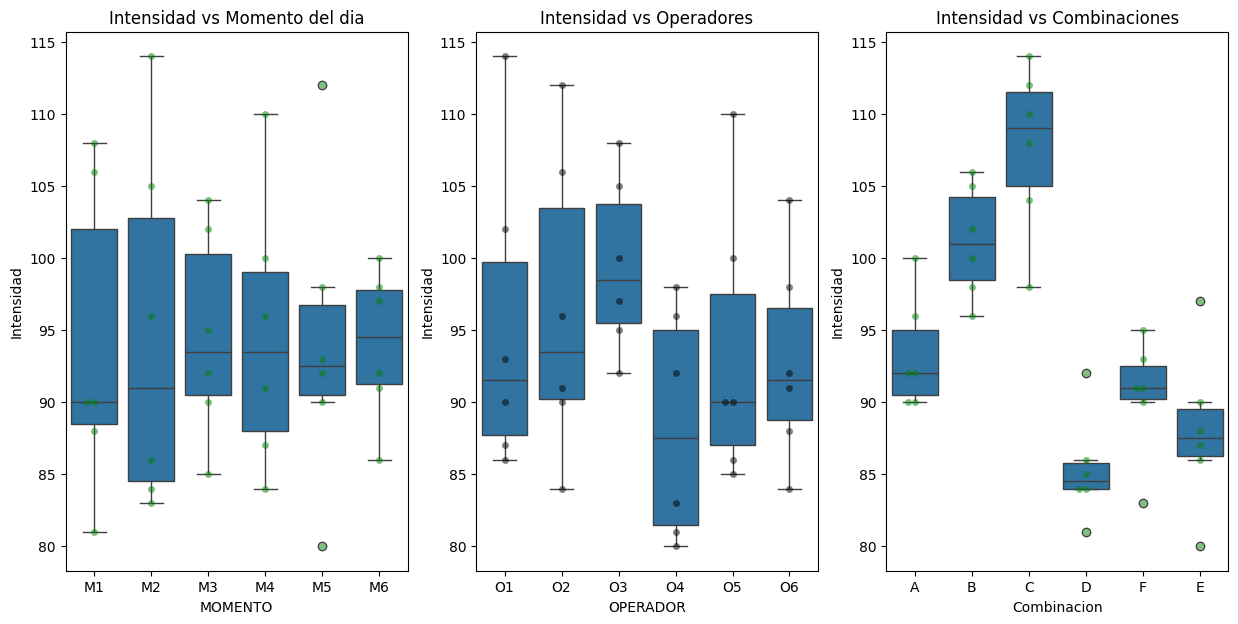

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 7))
axs[0].set_title('Intensidad vs Momento del dia')
sns.boxplot(x="MOMENTO", y="Intensidad", data=df1, ax=axs[0])
sns.swarmplot(x="MOMENTO", y="Intensidad", data=df1, color='green',
              alpha = 0.5, ax=axs[0])

axs[1].set_title('Intensidad vs Operadores')
sns.boxplot(x="OPERADOR", y="Intensidad", data=df1, ax=axs[1])
sns.swarmplot(x="OPERADOR", y="Intensidad", data=df1, color='black',
              alpha = 0.5, ax=axs[1])
axs[2].set_title('Intensidad vs Combinaciones')
sns.boxplot(x="Combinacion", y="Intensidad", data=df1, ax=axs[2])
sns.swarmplot(x="Combinacion", y="Intensidad", data=df1, color='green',
              alpha = 0.5, ax=axs[2])

**Comparaciones múltiples: Intensidad VS Combinación**

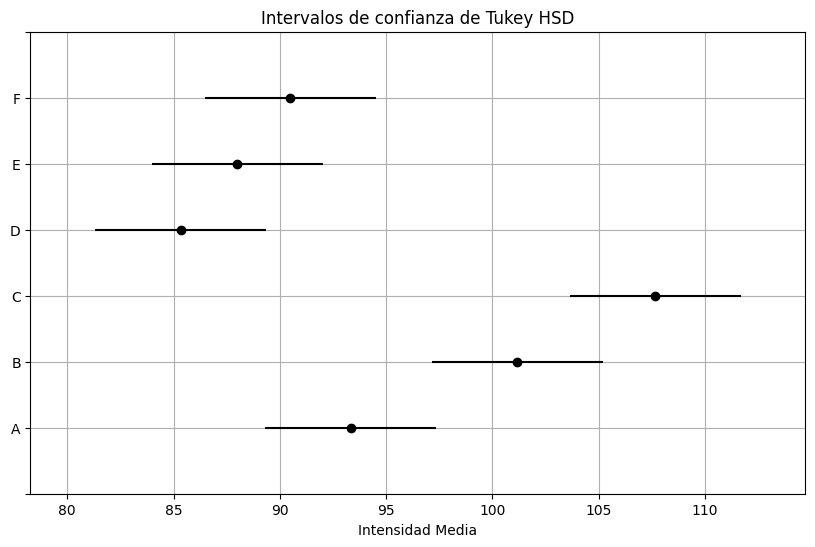

In [ ]:
# Comparaciones múltiples usando Tukey HSD
tukey_IvsC = pairwise_tukeyhsd(endog=df1["Intensidad"],     # Datos de la columna "Intensidad"
                          groups=df1["Combinacion"],   # Agrupación por "Combinacion"
                          alpha=0.05)                  # Nivel de significancia


# Graficar intervalos de confianza simultáneos
tukey_IvsC.plot_simultaneous(comparison_name=None)  # Si quieres comparar un grupo específico, pon su nombre en 'comparison_name'
plt.title('Intervalos de confianza de Tukey HSD')
plt.xlabel('Intensidad Media')
plt.grid(True)
plt.show()

**Comparaciones múltiples: Intensidad VS Momento del dia**

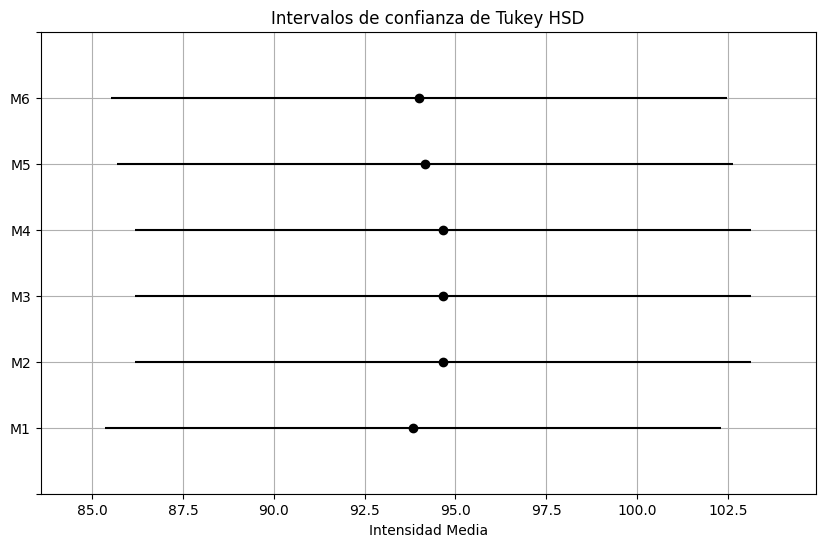

In [ ]:
# Comparaciones múltiples usando Tukey HSD
tukey_IvsM = pairwise_tukeyhsd(endog=df1["Intensidad"],     # Datos de la columna "Intensidad"
                          groups=df1["MOMENTO"],   # Agrupación por "momento del día"
                          alpha=0.05)                  # Nivel de significancia


# Graficar intervalos de confianza simultáneos
tukey_IvsM.plot_simultaneous(comparison_name=None)
plt.title('Intervalos de confianza de Tukey HSD')
plt.xlabel('Intensidad Media')
plt.grid(True)
plt.show()

**Comparaciones múltiples: Intensidad VS Operador**

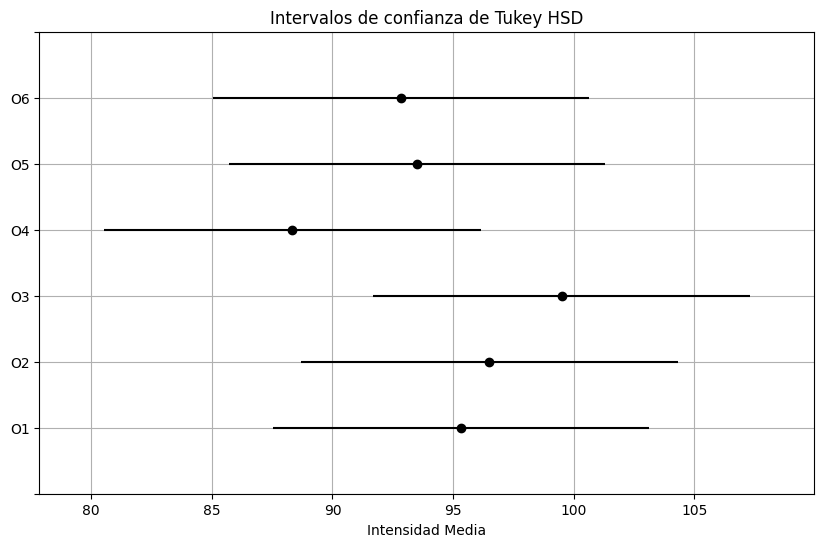

In [ ]:
# Comparaciones múltiples usando Tukey HSD
tukey_IvsO = pairwise_tukeyhsd(endog=df1["Intensidad"],     # Datos de la columna "Intensidad"
                          groups=df1["OPERADOR"],   # Agrupación por "operadores"
                          alpha=0.05)                  # Nivel de significancia


# Graficar intervalos de confianza simultáneos
tukey_IvsO.plot_simultaneous(comparison_name=None)
plt.title('Intervalos de confianza de Tukey HSD')
plt.xlabel('Intensidad Media')
plt.grid(True)
plt.show()

# R

In [ ]:
%load_ext rpy2.ipython
import logging
logging.getLogger('rpy2').setLevel(logging.ERROR)

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
# Instalar R y las librerías necesarias
!apt-get install -y r-base
!R -e "install.packages('dplyr', repos='http://cran.rstudio.com/')"

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
r-base is already the newest version (4.4.2-1.2204.0).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.

R version 4.4.2 (2024-10-31) -- "Pile of Leaves"
Copyright (C) 2024 The R Foundation for Statistical Computing
Platform: x86_64-pc-linux-gnu

R is free software and comes with ABSOLUTELY NO WARRANTY.
You are welcome to redistribute it under certain conditions.
Type 'license()' or 'licence()' for distribution details.

  Natural language support but running in an English locale

R is a collaborative project with many contributors.
Type 'contributors()' for more information and
'citation()' on how to cite R or R packages in publications.

Type 'demo()' for some demos, 'help()' for on-line help, or
'help.start()' for an HTML browser interface to help.
Type 'q()' to quit R.

> install.packages('dplyr', repos='http://cran.rstudio.com/')
Installing package into ‘/usr/local/lib/R

In [ ]:
!R -e "install.packages('ggplot2', repos='http://cran.rstudio.com/')"


R version 4.4.2 (2024-10-31) -- "Pile of Leaves"
Copyright (C) 2024 The R Foundation for Statistical Computing
Platform: x86_64-pc-linux-gnu

R is free software and comes with ABSOLUTELY NO WARRANTY.
You are welcome to redistribute it under certain conditions.
Type 'license()' or 'licence()' for distribution details.

  Natural language support but running in an English locale

R is a collaborative project with many contributors.
Type 'contributors()' for more information and
'citation()' on how to cite R or R packages in publications.

Type 'demo()' for some demos, 'help()' for on-line help, or
'help.start()' for an HTML browser interface to help.
Type 'q()' to quit R.

> install.packages('ggplot2', repos='http://cran.rstudio.com/')
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'http://cran.rstudio.com/src/contrib/ggplot2_3.5.1.tar.gz'
Content type 'application/x-gzip' length 3604371 bytes (3.4 MB)
downloaded 3.4 MB

* installing *source

In [ ]:
!R -e "install.packages('car', repos='http://cran.rstudio.com/')"

Streaming output truncated to the last 5000 lines.
                 from ../inst/include/Eigen/Dense:1,
                 from ../inst/include/RcppEigenForward.h:28,
                 from ../inst/include/RcppEigen.h:25,
                 from fastLm.h:25,
                 from fastLm.cpp:23:
../inst/include/Eigen/src/Core/CoreEvaluators.h: In instantiation of ‘struct Eigen::internal::evaluator<Eigen::Block<const Eigen::Matrix<double, -1, 1>, -1, 1, false> >’:
../inst/include/Eigen/src/Core/DenseCoeffsBase.h:142:7:   required from ‘Eigen::DenseCoeffsBase<Derived, 0>::CoeffReturnType Eigen::DenseCoeffsBase<Derived, 0>::coeff(Eigen::Index) const [with Derived = Eigen::Block<const Eigen::Matrix<double, -1, 1>, -1, 1, false>; Eigen::DenseCoeffsBase<Derived, 0>::CoeffReturnType = double; Eigen::Index = long int]’
../inst/include/Eigen/src/Core/DenseCoeffsBase.h:182:19:   required from ‘Eigen::DenseCoeffsBase<Derived, 0>::CoeffReturnType Eigen::DenseCoeffsBase<Derived, 0>::operator()(Eigen::Ind

In [ ]:
!R -e "install.packages('multcomp', repos='http://cran.rstudio.com/')"

In [ ]:
!R -e "install.packages('ggfortify', repos='http://cran.rstudio.com/')"

In [ ]:
# Ejecutar código en R
%%R

# Cargar librerías
library(dplyr)
library(ggplot2)
library(car)
library(multcomp)
library(ggfortify)

# Creación de dataframe a partir de los datos
data <- data.frame(
  Momento_del_dia = c(1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6),
  operador = c(1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6),
  Filtro = c('A', 'A', 'A', 'B', 'B', 'B', 'A', 'A', 'A', 'B', 'B', 'B', 'A', 'B', 'B', 'A', 'B', 'A', 'B', 'B', 'A', 'A', 'A', 'B', 'B', 'A', 'B', 'B', 'A', 'A', 'B', 'B', 'B', 'A', 'A', 'A'),
  Ruido = c(1, 2, 3, 1, 3, 2, 3, 1, 2, 3, 2, 1, 2, 2, 3, 1, 1, 3, 2, 1, 1, 2, 3, 3, 3, 3, 1, 2, 1, 2, 1, 3, 2, 3, 2, 1),
  Nivel_de_senal = c(90, 106, 108, 81, 90, 88, 114, 96, 105, 83, 86, 84, 102, 90, 95, 92, 85, 104, 87, 88, 100, 96, 110, 91, 93, 112, 92, 80, 90, 98, 86, 91, 97, 98, 100, 92)
)

# Convertir las variables categóricas en factores
data$Filtro <- as.factor(data$Filtro)
data$Ruido <- as.factor(data$Ruido)

# Análisis de varianza (ANOVA) con interacción entre Filtro y Ruido
anova_model <- aov(Nivel_de_senal ~ Filtro * Ruido, data = data)
summary(anova_model)

# Prueba de Tukey HSD
tukey_result <- TukeyHSD(anova_model)
print(tukey_result)

# Prueba LSD (Least Significant Difference)
lsd_result <- glht(anova_model, linfct = mcp(Filtro = "Tukey"))
summary(lsd_result)

# Gráficos
# Gráfico de caja
ggplot(data, aes(x = Filtro, y = Nivel_de_senal)) +
  geom_boxplot() +
  theme_minimal() +
  labs(title = "Boxplot of Signal Level by Filter", x = "Filter", y = "Signal Level")

# Gráfico de Tukey HSD
plot(tukey_result)

# Gráfico de residuos
residuals <- residuals(anova_model)
fitted <- fitted(anova_model)

ggplot(data.frame(Fitted = fitted, Residuals = residuals), aes(x = Fitted, y = Residuals)) +
  geom_point() +
  geom_hline(yintercept = 0, linetype = "dashed") +
  theme_minimal() +
  labs(title = "Residuals vs Fitted", x = "Fitted values", y = "Residuals")

# Gráfica QQ
qqnorm(residuals)
qqline(residuals, col = "red")

# Gráfico de los resultados LSD
# La función autoplot no soporta directamente glht; se usa plot()
plot(lsd_result)



Error in library(car) : there is no package called ‘car’
